In [1]:
import sys
sys.path.append('/Users/billystrickland/Documents/code/resonators')
import matplotlib.pyplot as plt
from shabanipy.labber import LabberData
from shabanipy.resonators.notch_geometry import fit_complex
import numpy as np
import cmath 
import os
from shabanipy.jy_mpl_settings.settings import jy_mpl_rc
from shabanipy.jy_mpl_settings.colors import line_colors
import utils.resonator_functions as rf
import utils.qubit_functions as qf

plt.style.use(jy_mpl_rc)

# Setup directory to import data from

In [2]:
sample = 'JS682-2qmem-1gmon-1-BS-001'
savepath = '/Users/billystrickland/Documents/code/resonators/data/'+sample+'/'
root = '/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/.shortcut-targets-by-id/1p4A2foj_vBr4k6wrGEIpURdVkG-qAFgb/nyu-quantum-engineering-lab/labber/data-backups/qubitfridge/Data/'

# Dispersive shift (drive on/drive off) traces

Single tone transmission through readout resonator with and without drive tone at qubit frequency.

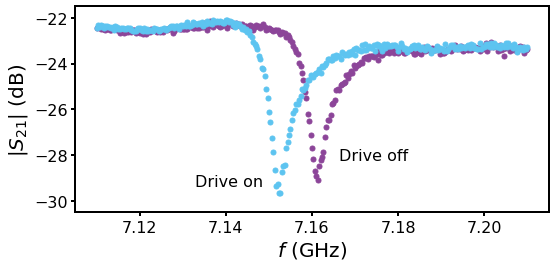

In [5]:
# Define the file path to the HDF5 data file. The file contains data from a measurement setup.
file = '2023/02/Data_0213/JS682-2qmem-1gmon-1-BS-001-332.hdf5'
# Concatenate the root path with the file name to create the full file path.
FILE = root + file

# Define the data channel names for the power and S21 measurements.
P_CH, S21_CH = ['SC1 - Output', 'VNA - S21']

# Open the HDF5 file using the LabberData context manager. This ensures the file is properly handled and closed after reading.
with LabberData(FILE) as f:
    # Extract the data corresponding to the power channel (P_CH).
    output = f.get_data(P_CH)
    # Extract the frequency and S21 data. The `get_x=True` ensures that the frequency values are returned as the x-axis data.
    freq, data = f.get_data(S21_CH, get_x=True)

# Convert the S21 data to dB (decibels) for both drive on and drive off states using a utility function.
data_on = rf.to_db(abs(data[0][0]))  # Convert the first data trace (Drive off) to dB.
data_off = rf.to_db(abs(data[0][1]))  # Convert the second data trace (Drive on) to dB.

# Convert the frequency from GHz to Hz for plotting (multiply by 1e-9 to scale).
x = np.array(freq[0][0]) * 1e-9

# Define the label for the y-axis to indicate that the data represents |S21| in dB.
y_label = r'$|S_{21}|$ (dB)'

# Create a figure and axis for plotting using a custom plotting function (likely from a library).
fig, ax = rf.make_plot_pre('$f$ (GHz)', y_label, figsize=(8, 4))

# Set the y-axis limits for better visualization of the data.
plt.ylim(-30.5, -21.5)

# Plot the "Drive off" data as scatter points (without lines).
plt.plot(x, data_on, linestyle='None', marker='.', label='Drive off', color=line_colors[2])

# Plot the "Drive on" data as scatter points (without lines).
plt.plot(x, data_off, linestyle='None', marker='.', label='Drive on', color=line_colors[5])

# Find the frequency at which the "Drive off" data reaches its minimum value (minimum signal).
distance_on = x[np.argmin(data_on)]

# Find the frequency at which the "Drive on" data reaches its minimum value (minimum signal).
distance_off = x[np.argmin(data_off)]

# Optionally, you can plot arrows to visually highlight the distance between the two minimums (currently commented out).
# The arrows would point from the minimum value of "Drive on" to "Drive off" and vice versa.

# Annotate the plot with labels for "Drive off" and "Drive on".
ax.annotate('Drive off', xycoords='figure fraction', xy=(0.61, .4))  # Position annotation for "Drive off".
ax.annotate('Drive on', xycoords='figure fraction', xy=(0.35, .3))  # Position annotation for "Drive on".

# Define the save path and filename for saving the plot.
savename = savepath + 'onoff'

# The following line is commented out, but it would be used to save the plot in a specific format.
# rf.make_plot_post(fig, savename, format='pdf')

# Adjust layout to avoid overlapping elements.
plt.tight_layout()

# Save the figure as a PDF file to the specified path.
plt.savefig(f'{savename}.pdf', format='pdf')


# Anticrossing 1

Single tone across transmission line near the readout resonator frequency sweeping gate voltage, large range

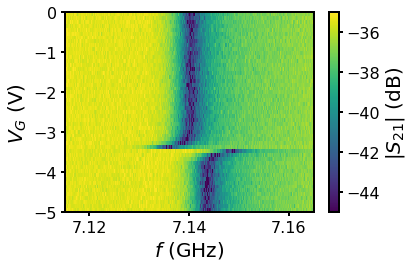

In [6]:
# Define the file path using a specific format, incorporating the year, month, day, and sample number.
# The root path (root) and other variables like year, month, day, file number, and sample name should be defined elsewhere.
file_num = '017'  # Sample file number.
year, month, day = '2023', '02', '02'  # Date components for the file path.
FILE = root + year + '/' + month + '/Data_' + month + day + '/' + sample + '-' + file_num + '.hdf5'

# Define the channel names for the data we are extracting: 'Voltage Bias - Source voltage' and 'VNA - S21'.
P_CH, S21_CH = ['Voltage Bias - Source voltage', 'VNA - S21']

# Initialize variables to store the data later.
power, freq, data = None, None, None

# Open the HDF5 file using the LabberData context manager, which ensures the file is properly handled and closed after use.
with LabberData(FILE) as f:
    # Extract the gate voltage (power) data from the file.
    gate = f.get_data(P_CH)
    # Extract the frequency and S21 data. The `get_x=True` ensures that the frequency data is also returned as the x-axis.
    freq, data = f.get_data(S21_CH, get_x=True)

# Calculate the absolute value of the S21 data for the anti-resonant part (data_anti).
data_anti = abs(data[:, 0])

# Convert the frequency values from GHz to Hz by multiplying by 1e-9.
x = np.array(freq[0]) * 1e-9

# Set the plotting style using a custom Matplotlib style (likely defined elsewhere as `jy_mpl_rc`).
with plt.rc_context(jy_mpl_rc):
    # Create a single subplot with the specified figure size.
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))

    # Create an image plot (heatmap) for the magnitude of the S21 parameter in dB.
    # `rf.to_db(data_anti)` converts the S21 data to dB scale.
    img = ax.imshow(rf.to_db(data_anti), cmap='viridis',
                    extent=[freq[0][0][0] * 1e-9, freq[0][0][-1] * 1e-9, gate[-1][0], gate[0][0]],
                    aspect='auto', interpolation='nearest', vmin=-45, vmax=-35)
    
    # Set the x-axis label (frequency in GHz).
    ax.set_xlabel('$f$ (GHz)')
    # Set the y-axis label (gate voltage).
    ax.set_ylabel('$V_G$ (V)')
    
    # Add a colorbar to the plot with the label indicating the unit (dB).
    cbar = plt.colorbar(img)
    cbar.set_label('$|S_{21}|$ (dB)')

    # Define the save path for the figure. The savepath variable should be defined elsewhere in the code.
    savename = savepath + '_anti'
    
    # Save the plot using the custom plot saving function (likely defined elsewhere in the code).
    rf.make_plot_post(fig, savename)


# Anticrossing 2

Single tone across transmission line near the readout resonator frequency sweeping gate voltage, small range

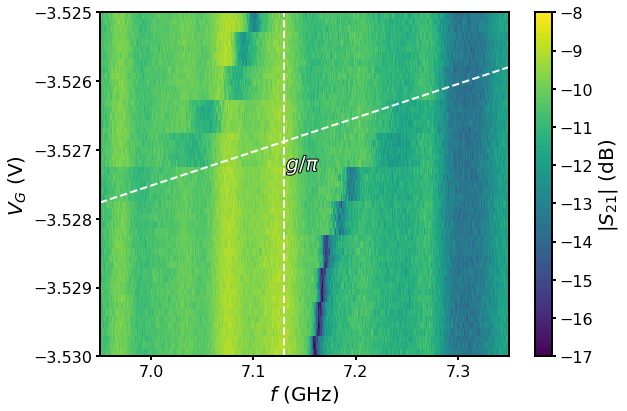

In [7]:
# Define the sample file number and other parameters such as the attenuation.
file_num = '343'  # Sample file number

# Define the year, month, and day of the data for the file path.
year, month, day = '2023', '02', '13'

# Create the full file path using the root directory, date, and sample number.
FILE = root + year + '/' + month + '/Data_' + month + day + '/' + sample + '-' + file_num + '.hdf5'

# Define the channel names for the voltage bias and S21 data.
P_CH, S21_CH = ['Voltage Bias - Source voltage', 'VNA - S21']

# Initialize variables for the extracted data.
power, freq, data = None, None, None

# Open the HDF5 file using the LabberData context manager, ensuring proper file handling.
with LabberData(FILE) as f:
    # Extract the power (gate voltage) and S21 data from the file.
    power = f.get_data(P_CH)
    freq, data = f.get_data(S21_CH, get_x=True)

# Create the plot figure and axis with a specific size (9x6 inches).
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

# Generate a heatmap of the S21 data in dB. Convert the data magnitude to dB using rf.to_db().
# Set the x and y axis limits using `extent` and the color scale limits using `vmin` and `vmax`.
img = ax.imshow(rf.to_db(abs(data)), cmap='viridis',
                extent=[freq[0][0] * 1e-9, freq[0][-1] * 1e-9, power[-1], power[0]], aspect='auto',
                interpolation='nearest', vmin=-17, vmax=-8)

# Plot a vertical dashed line at 7.13 GHz.
plt.axvline(x=7.13, linestyle='--', color='w')

# Plot a linear function (could be a fit or model) as a white dashed line.
x = np.array(freq[0]) * 1e-9  # Convert frequency to GHz
plt.plot(x, 0.004926 * x - 3.562, linestyle='--', color='w')

# Set the axis labels.
ax.set_xlabel('$f$ (GHz)')
ax.set_ylabel('$V_G$ (V)')

# Add a labeled annotation at the point (7.132, -3.5273), indicating a significant feature.
import matplotlib.patheffects as PathEffects
txt = plt.text(7.132, -3.5273, '$g/\pi$', size=20, color='white')
txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])  # White text with black border.

# Add the colorbar with a label for the S21 magnitude in dB.
cbar = plt.colorbar(img)
cbar.set_label('$|S_{21}|$ (dB)')

# Define the save name for the plot file.
savename = savepath + '_anti_zoom'

# Save the plot using the custom plot saving function.
rf.make_plot_post(fig, savename)


# Power sweep

Single tone across transmission line near the readout resonator frequency sweeping the readout power. The qubit gate is set to something below the readout resonator detuned by ~ 1 GHz or so. 

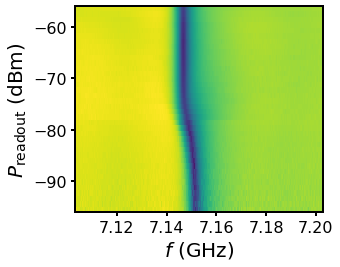

In [8]:
# Define the file number and year, month, and day for the first dataset.
file_num = '444'
att = [0]  # Attenuation value to subtract from the data
year, month, day = '2023', '02', '22'

# Create the full file path for the data file.
FILE = root + year + '/' + month + '/Data_' + month + day + '/' + sample + '-' + file_num + '.hdf5'

# Define the fridge attenuation.
fridge_att = 56

# Define the channels for VNA output power and S21 data.
P_CH, S21_CH = ['VNA - Output power', 'VNA - S21']

# Open the first data file and extract the power and S21 data.
with LabberData(FILE) as f:
    power = f.get_data(P_CH) - att - fridge_att  # Adjust power by subtracting attenuation and fridge attenuation
    freq, data = f.get_data(S21_CH, get_x=True)  # Extract frequency and S21 data

# Convert the magnitude of S21 data to dB.
data_0db = rf.to_db(abs(data))

# Now work with the second dataset (file number 443).
file_num = '443'
FILE = root + year + '/' + month + '/Data_' + month + day + '/' + sample + '-' + file_num + '.hdf5'

# Open the second data file and extract power and S21 data.
with LabberData(FILE) as f:
    power = f.get_data(P_CH) - att - fridge_att  # Adjust power
    freq, data = f.get_data(S21_CH, get_x=True)  # Extract frequency and S21 data

# Convert the magnitude of the second S21 dataset to dB.
data_20db = rf.to_db(abs(data))

# Convert frequency to GHz for plotting.
x = np.array(freq) * 1e-9

# Combine the two datasets (0 dB and 20 dB) by concatenating them and averaging the data.
data_combo = np.concatenate((data_0db, data_20db[4::]), axis=0)  # Combine, skipping the first 4 indices of the 20dB data.
data_combo = rf.average_data(data_combo)  # Average the combined data.

# Create a plot to visualize the data.
with plt.rc_context(jy_mpl_rc):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))  # Create a figure and axis for the plot
    img = ax.imshow(data_combo, cmap='viridis',  # Plot the data as a heatmap
                    extent=[freq[0][0] * 1e-9, freq[0][-1] * 1e-9, -96, -56], aspect='auto',
                    interpolation='nearest')  # Set the extent and interpolation

    # Set axis labels.
    ax.set_xlabel('$f$ (GHz)')
    ax.set_ylabel('$P_\mathrm{readout}$ (dBm)')

    # Define the save path and save the plot.
    savename = savepath + 'powerdep'
    rf.make_plot_post(fig, savename)  # Save the plot


# Two tone vs gate voltage

Two tone spectroscopy. Readout tone fixed to the readout resonator frequency with drive tone frequency and gate voltage swept. 

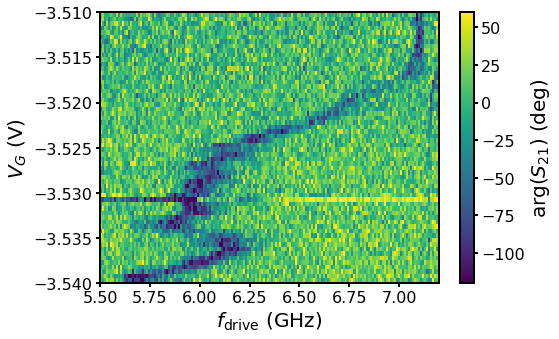

In [9]:
# Define the file number and year, month, and day for the dataset.
file_num = '180'
year, month, day = '2023', '02', '09'

# Create the full file path for the data file.
FILE = root + year + '/' + month + '/Data_' + month + day + '/' + sample + '-' + file_num + '.hdf5'

# Define the channels for voltage bias, S21 data, and drive frequency.
P_CH, S21_CH, D_CH = ['Voltage Bias - Source voltage', 'VNA - S21', 'Tone - Frequency']

# Open the data file and extract the power, S21 data, and drive frequency.
with LabberData(FILE) as f:
    power = f.get_data(P_CH)  # Extract power (voltage bias)
    freq, data = f.get_data(S21_CH, get_x=True)  # Extract frequency and S21 data
    drive = f.get_data(D_CH)  # Extract drive frequency

# Select a subset of the data for processing (specific indices for S21 data).
complex_array = data[50:110, 150::, -4]  # Select data slice (complex values)
array_shape = np.shape(complex_array)  # Get the shape of the selected data

# Create an empty array to store the phase values of the complex S21 data.
phase_array = np.zeros(array_shape)

# Calculate the phase of each complex element in the array.
for i in range(array_shape[0]):
    for j in range(array_shape[1]):
        phase_array[i, j] = cmath.phase(complex_array[i, j])  # Calculate the phase

# Calculate the average phase for each row (across columns).
average_phase = np.mean(phase_array, axis=1)

# Subtract the average phase from each element in the phase array for each row.
for i in range(array_shape[0]):
    phase_array[i] -= average_phase[i]  # Center the phase data

# Extract the drive frequency for plotting.
x = drive[0]

# Create the plot using the 'viridis' colormap.
with plt.rc_context(jy_mpl_rc):
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))  # Create a figure and axis
    img = ax.imshow(360 / 2 * np.pi * phase_array, cmap='viridis',  # Convert phase to degrees
                    extent=[x[150] * 1e-9, x[-1] * 1e-9, power[110][0], power[50][0]], aspect='auto',
                    interpolation='nearest')  # Set extent and interpolation

    # Set axis labels.
    ax.set_xlabel('$f_\mathrm{drive}$ (GHz)')
    ax.set_ylabel('$V_G$ (V)')

    # Adjust the color scale limits for phase values.
    img.set_clim(-120, 60)

    # Add a colorbar to indicate phase values in degrees.
    cbar = plt.colorbar(img)
    cbar.set_label('arg$(S_{21})$ (deg)')

    # Define the save path and save the plot.
    savename = savepath + '_twotone'
    rf.make_plot_post(fig, savename)  # Save the plot


# Two tone vs power:

Two tone, readout tone fixed to the readout resonator. Drive tone frequency and drive power is swept around the qubit frequency

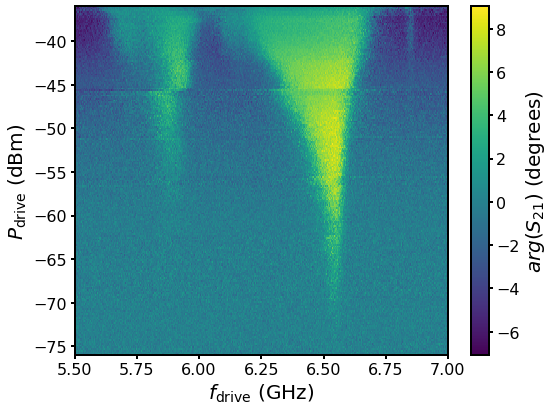

In [11]:
# Define the file number and year, month, and day for the dataset.
file_num = '317'
att = [20]
year, month, day = '2023', '02', '12'

# Create the full file path for the data file.
FILE = root + year + '/' + month + '/Data_' + month + day + '/' + sample + '-' + file_num + '.hdf5'

# Define the channels for tone amplitude, S21 data, and drive frequency.
P_CH, S21_CH, D_CH = ['Tone - Amplitude', 'VNA - S21', 'Tone - Frequency']

# Open the data file and extract the power, S21 data, and drive frequency.
with LabberData(FILE) as f:
    power = f.get_data(P_CH)  # Extract power (tone amplitude)
    freq, data = f.get_data(S21_CH, get_x=True)  # Extract frequency and S21 data
    drive = f.get_data(D_CH)  # Extract drive frequency

# Select a subset of the data for processing (specifically the real part of S21 data).
complex_array = data[:, :, 1]  # Extract real part of the S21 data
array_shape = np.shape(complex_array)  # Get the shape of the selected data

# Create an empty array to store the phase values of the complex S21 data.
phase_array = np.zeros(array_shape)

# Calculate the phase of each complex element in the array.
for i in range(array_shape[0]):
    for j in range(array_shape[1]):
        phase_array[i, j] = cmath.phase(complex_array[i, j])  # Calculate the phase

# Define a rotation factor to prevent phase wrapping.
rotation = 2 * np.pi

# Check and apply the fixed rotation to prevent phase wrapping
phase_array = np.mod(phase_array + rotation, 2 * np.pi)  # Ensure phase is in the range [0, 2*pi]

# Calculate the average phase for each row (across columns).
average_phase = np.mean(phase_array, axis=1)

# Subtract the average phase from each element in the phase array for each row.
for i in range(array_shape[0]):
    phase_array[i] -= average_phase[i]  # Center the phase data

# Extract the drive frequency for plotting.
x = drive[0]

# Create the plot using the 'viridis' colormap.
with plt.rc_context(jy_mpl_rc):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))  # Create a figure and axis
    img = ax.imshow(phase_array * 2 * np.pi, cmap='viridis',  # Convert phase to degrees
                    extent=[x[0] * 1e-9, x[-1] * 1e-9, -20 - 56, 20 - 56], aspect='auto',
                    interpolation='nearest')  # Set extent and interpolation

    # Set axis labels.
    ax.set_xlabel('$f_\mathrm{drive}$ (GHz)')
    ax.set_ylabel('$P_\mathrm{drive}$ (dBm)')

    # Add a colorbar to indicate phase values in degrees.
    cbar = plt.colorbar(img)
    cbar.set_label('$arg(S_{21})$ (degrees)')

    # Define the save path and save the plot.
    savename = savepath + '_twotone_power'

    # Uncomment to save the plot using rf.make_plot_post if necessary.
    # rf.make_plot_post(fig, savename)

    # Adjust layout and save the plot as a PDF.
    fig.tight_layout()
#     plt.savefig('/Users/billystrickland/Documents/thesis/twotone_power.pdf', format='pdf')


# Resonator baseline scan

Wide resonator baseline scan. Single tone across the transmission line with a wide range varying readout frequency to identify readout resonators.

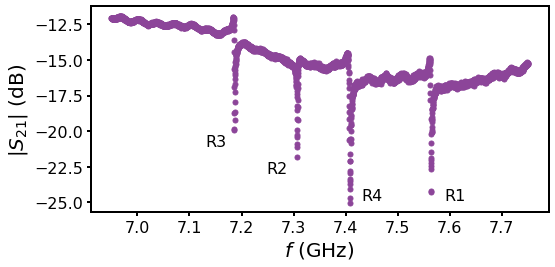

In [12]:
# Define the sample and file paths
sample = 'JS682-4gmon-v1-002-BSJL-001'
savepath = '/Users/billystrickland/Documents/code/resonators/data/' + sample + '/'
root = '/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/.shortcut-targets-by-id/1p4A2foj_vBr4k6wrGEIpURdVkG-qAFgb/nyu-quantum-engineering-lab/labber/data-backups/qubitfridge/Data/2023/'

# Set the file number and the date for the dataset
file_num = '001'
year, month, day = '2023', '03', '21'

# Construct the full file path for the data file
FILE = root + month + '/Data_' + month + day + '/' + sample + '-' + file_num + '.hdf5'

# Define the channels for center frequency and S21 data
P_CH, S21_CH = ['VNA - Center frequency', 'VNA - S21']

# Open the Labber data file and extract the relevant data
with LabberData(FILE) as f:
    power = f.get_data(P_CH) - att - 56  # Adjust power by subtracting attenuation and fridge attenuation
    freq, data = f.get_data(S21_CH, get_x=True)  # Extract frequency and S21 data

# Flatten and convert the S21 data to dB for the selected frequency range
data_stitched = rf.to_db(abs(data[0][30:38].flatten()))
x = np.array(freq[0][30:38].flatten()) * 1e-9  # Convert frequency to GHz

# Create the plot
with plt.rc_context(jy_mpl_rc):
    y_label = '$|S_{21}|$ (dB)'  # Define the label for the y-axis
    fig, ax = rf.make_plot_pre('$f$ (GHz)', y_label, figsize=(8, 4))  # Set up the plot

    # Plot the data with markers and no line
    plt.plot(x, data_stitched, linestyle='None', marker='.', color=line_colors[2])

    # Annotate the plot with resonance labels
    ax.annotate('R3', xycoords='figure fraction', xy=(0.37, .45))
    ax.annotate('R2', xycoords='figure fraction', xy=(0.48, .35))
    ax.annotate('R4', xycoords='figure fraction', xy=(0.65, .25))
    ax.annotate('R1', xycoords='figure fraction', xy=(0.80, .25))

    # Define the save path and save the plot as an EPS file
    savename = savepath + '_' + y_label + '.eps'
    rf.make_plot_post(fig, savename)
